In [196]:
! pip install pandas

In [197]:
! pip install seaborn

In [198]:
! pip install matplotlib

In [199]:
import pandas
import matplotlib
import os

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
pandas.read_csv('ThreeCitiesData.csv')

,OYO 8404 Hotel Aerofly,"Near Airport, Mahipalpur, Delhi",1049,New
0,OYO 7634 Hotel Delhi Continental,"Plot No. 8218-19, Arakashan Road, Delhi",1332,New
1,OYO 3349 Hotel Anoop,"Plot No. 1566, Main Bazar, Delhi",1332,3.7
2,OYO 7619 Hotel Smart Stay,"Near NH8, Aerocity, Delhi",1332,3.7
3,OYO 7844 Hotel Welcome Plaza,"Plot No. 15-A/53, W.E.A, Ajmal Khan Road, Karo...",1601,3.7
4,OYO 497 Hotel Welcome Palace,"Near Vaishno Devi Mandir, Arakashan Road, Paha...",1721,3.7
5,OYO 9726 Hotel Aura Palace Deluxe,"Sangtrashan, Pahar Ganj, Delhi",1741,4.3
6,OYO 12171 Hotel Sky View,"Mahipalpur Extention, Delhi",1750,4.3
7,OYO 6169 Hotel Prem Deluxe,"Near New Delhi Railway Station, Paharganj, Delhi",1765,4.4
8,OYO 11633 Hotel Sweet Palace,"Main Vasant Kunj Road, Mata Chowk, Mahipalpur,...",1768,4.4
9,OYO 4930 Home Stay EM Residency,"Opp. CNG Station Pul, Praladpur, Pul Pehlad Pu...",1332,New


In [203]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,440.0,2074.731818,939.090626,999.0,1201.0,1902.0,2663.0,4999.0


Get the hotels pricing statistics on numeric variables once for all, a function available in online tutorials.
(A trick to have fun with, not related to my story points.)

In [204]:
df = pandas.read_csv('ThreeCitiesData.csv', header = None, names = ['Hotel', 'Location', 'Price', 'Rating'])

df_delhi = pandas.read_csv('Delhi_OYO_Hotels_Comparison.csv', header = None, names = ['HotelDelhi', 'LocationDelhi', 'PriceDelhi', 'RatingDelhi'])
df_jaipur = pandas.read_csv('Jaipur_OYO_Hotels_Comparison.csv', header = None, names = ['HotelJaipur', 'LocationJaipur', 'PriceJaipur', 'RatingJaipur'])
df_agra = pandas.read_csv('Agra_OYO_Hotels_Comparison.csv', header = None, names = ['HotelAgra', 'LocationAgra', 'PriceAgra', 'RatingAgra'])

Datasets have been collected in two manners: 
1. ThreeCitiesData.csv, an assembly of hotels information of all the three cities;
2. The datasets presented in three different csv files in case of further usage.

In [205]:
df

,Hotel,Location,Price,Rating
0,OYO 8404 Hotel Aerofly,"Near Airport, Mahipalpur, Delhi",1049,New
1,OYO 7634 Hotel Delhi Continental,"Plot No. 8218-19, Arakashan Road, Delhi",1332,New
2,OYO 3349 Hotel Anoop,"Plot No. 1566, Main Bazar, Delhi",1332,3.7
3,OYO 7619 Hotel Smart Stay,"Near NH8, Aerocity, Delhi",1332,3.7
4,OYO 7844 Hotel Welcome Plaza,"Plot No. 15-A/53, W.E.A, Ajmal Khan Road, Karo...",1601,3.7
5,OYO 497 Hotel Welcome Palace,"Near Vaishno Devi Mandir, Arakashan Road, Paha...",1721,3.7
6,OYO 9726 Hotel Aura Palace Deluxe,"Sangtrashan, Pahar Ganj, Delhi",1741,4.3
7,OYO 12171 Hotel Sky View,"Mahipalpur Extention, Delhi",1750,4.3
8,OYO 6169 Hotel Prem Deluxe,"Near New Delhi Railway Station, Paharganj, Delhi",1765,4.4
9,OYO 11633 Hotel Sweet Palace,"Main Vasant Kunj Road, Mata Chowk, Mahipalpur,...",1768,4.4


Check if the header works properly.

In [218]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["patch.force_edgecolor"] = True

A plotting method to flexibly plot a univariate distribution of observations, which is avaliable in GitHub:
https://github.com/StephanieStallworth/Exploratory_Data_Analysis_Visualization_Python/blob/master/Python%20A-Z%20Movie%20Rating%20Data%20Visualization.ipynb

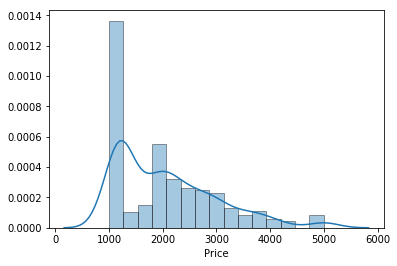

In [219]:
PriceAnalysis = sns.distplot(df.Price, bins = 15)

Graph information: 
The histogram demonstrates the distribution of hotel prices in the three cities.

- Story point 1

Most hotels in the three northern Indian cities, Delhi, Jaipur and Agra, which are generally known as the "golden triangle cities", have their prices ranging from ₹1,000₹ to ₹5,000. 
The largest number of hotels have their rooms tagged from ₹1,000 to ₹1,250, and then the hotel numbers descending with the room price getting higher.

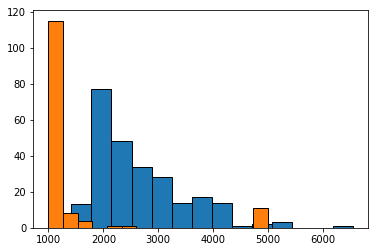

In [223]:
plt.hist(df_delhi.PriceDelhi, bins = 15)
plt.hist(df_jaipur.PriceJaipur, bins = 15)
plt.show()

Graph information: The stacked histogram illustrates the comparison of hotel prices between Delhi (blue) and Jaipur (orange).

- Story point 2 

Take a close look into each city, some distinctive features can be discovered: Most hotels in Jaipur cost ₹1,000 to ₹1,250, a characteristic that is very much identical to that of the general pricing distribution; while in Delhi, the prices are distributed in a relatively more even manner, with the prices of most hotels spreading around the block roughly between ₹2,000 and ₹4,500, from which we can identify that the housing price is more expensive in Delhi.

In [210]:
df.sort_values(by = 'Rating', ascending = False)

,Hotel,Location,Price,Rating
0,OYO 8404 Hotel Aerofly,"Near Airport, Mahipalpur, Delhi",1049,New
160,OYO 9643 Hotel All Heavens,"Wazirpur Ring Road, Delhi",2666,New
240,OYO 12464 Hotel C Pearls,"Above VISHAL MEGA MART, Metro Pillar no 511, M...",3732,New
233,OYO 518 Hotel Sundeep Inn,"Near Holy Angels Hospital, Vasant vihar, Delhi",3499,New
232,OYO 10960 Hotel Royal India,"Road no 32, Punjabi Bagh, Delhi",3411,New
221,OYO 8305 Blessings Inn,"Police Line Marg, Pitampura, Delhi",3327,New
1,OYO 7634 Hotel Delhi Continental,"Plot No. 8218-19, Arakashan Road, Delhi",1332,New
208,OYO 476 Hotel Gera's,"Opp. Karnataka Bank, Kalkaji Branch, Delhi",3242,New
201,OYO 383 Hotel Divine Paradise,"New Friends Colony, Opposite Maharani Bagh, Delhi",3000,New
200,OYO 448 Hotel Pals Inn,"Near Central Park, East Patel Nagar, Main Mark...",2999,New


- Story point 3

In terms of the hotels' rating in the three cities, it is visible that many hotels, marked with the word "New", have not had any rating credit yet. Thus we may reach a story idea that the Indian tourism industry is prospering since many hotels have recently been built and opened to tourists.

While to other hotels, ratings have been divided into four categories: 

Excellent: 4.5-4.9;
Very good: 4.0-4.4;
Good: 3.5-3.9;
Fair: 3.1-3.4;

Delving into the rating distribution of hotels in the three cities, we can have a general idea about their service.

In [211]:
def cr_Delhi(a):
    rating_number_delhi = len(df_delhi[df_delhi['RatingDelhi'] == a])
    return rating_number_delhi

New_d = cr_Delhi('New')
Excellent_d = cr_Delhi('4.5') + cr_Delhi('4.6') + cr_Delhi('4.7') + cr_Delhi('4.8') + cr_Delhi('4.9')
VeryGood_d = cr_Delhi('4.0') + cr_Delhi('4.1') + cr_Delhi('4.2') + cr_Delhi('4.3') + cr_Delhi('4.4')
Good_d = cr_Delhi('3.5') + cr_Delhi('3.6') + cr_Delhi('3.7') + cr_Delhi('3.8') + cr_Delhi('3.9')
Fair_d = cr_Delhi('3.0') + cr_Delhi('3.1') + cr_Delhi('3.2') + cr_Delhi('3.3') + cr_Delhi('3.4')

Rating_Delhi = {}
Rating_Delhi['New']=New_d
Rating_Delhi['Excellent']=Excellent_d 
Rating_Delhi['VeryGood']=VeryGood_d
Rating_Delhi['Good']=Good_d
Rating_Delhi['Fair']=Fair_d

print(Rating_Delhi)

{'New': 55, 'Excellent': 48, 'VeryGood': 137, 'Good': 18, 'Fair': 2}


Collect rating statistics by sorting credits and "New" into the five aforementioned categories. The step has been repeated for three times, using the individual dataset of each city.

In [212]:
def cr_Jaipur(b):
    rating_number_jaipur = len(df_jaipur[df_jaipur['RatingJaipur'] == b])
    return rating_number_jaipur

New_j = cr_Jaipur('New')
Excellent_j = cr_Jaipur('4.5') + cr_Jaipur('4.6') + cr_Jaipur('4.7') + cr_Jaipur('4.8') + cr_Jaipur('4.9')
VeryGood_j = cr_Jaipur('4.0') + cr_Jaipur('4.1') + cr_Jaipur('4.2') + cr_Jaipur('4.3') + cr_Jaipur('4.4')
Good_j = cr_Jaipur('3.5') + cr_Jaipur('3.6') + cr_Jaipur('3.7') + cr_Jaipur('3.8') + cr_Jaipur('3.9')
Fair_j = cr_Jaipur('3.0') + cr_Jaipur('3.1') + cr_Jaipur('3.2') + cr_Jaipur('3.3') + cr_Jaipur('3.4')

Rating_Jaipur = {}
Rating_Jaipur['New']=New_j
Rating_Jaipur['Excellent']=Excellent_j 
Rating_Jaipur['VeryGood']=VeryGood_j
Rating_Jaipur['Good']=Good_j
Rating_Jaipur['Fair']=Fair_j

print (Rating_Jaipur)

{'New': 29, 'Excellent': 29, 'VeryGood': 66, 'Good': 4, 'Fair': 0}


In [213]:
def cr_Agra(c):
    rating_number_agra = len(df_agra[df_agra['RatingAgra'] == c])
    return rating_number_agra

New_a = cr_Agra('New')
Excellent_a = cr_Agra('4.5') + cr_Agra('4.6') + cr_Agra('4.7') + cr_Agra('4.8') + cr_Agra('4.9')
VeryGood_a = cr_Agra('4.0') + cr_Agra('4.1') + cr_Agra('4.2') + cr_Agra('4.3') + cr_Agra('4.4')
Good_a = cr_Agra('3.5') + cr_Agra('3.6') + cr_Agra('3.7') + cr_Agra('3.8') + cr_Agra('3.9')
Fair_a = cr_Agra('3.0') + cr_Agra('3.1') + cr_Agra('3.2') + cr_Agra('3.3') + cr_Agra('3.4')

Rating_Agra = {}
Rating_Agra['New']=New_a
Rating_Agra['Excellent']=Excellent_a 
Rating_Agra['VeryGood']=VeryGood_a
Rating_Agra['Good']=Good_a
Rating_Agra['Fair']=Fair_a

print (Rating_Agra)

{'New': 6, 'Excellent': 2, 'VeryGood': 26, 'Good': 6, 'Fair': 0}


In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

your_df = pandas.DataFrame(data = {'Golden Triagle Cities':['Delhi', 'Jaipur', 'Agra'],
            'New':[55, 29, 6],
            'Excellent':[48, 29, 2],
            'VeryGood':[137, 66, 26],
            'Good':[18, 4, 6],
            'Fair':[2, 0, 0]})
long_df = pandas.melt(your_df, id_vars = ['Golden Triagle Cities'], value_vars = ['New', 'Excellent', 'VeryGood', 'Good', 'Fair'])
print(long_df)

   Golden Triagle Cities   variable  value
0                  Delhi        New     55
1                 Jaipur        New     29
2                   Agra        New      6
3                  Delhi  Excellent     48
4                 Jaipur  Excellent     29
5                   Agra  Excellent      2
6                  Delhi   VeryGood    137
7                 Jaipur   VeryGood     66
8                   Agra   VeryGood     26
9                  Delhi       Good     18
10                Jaipur       Good      4
11                  Agra       Good      6
12                 Delhi       Fair      2
13                Jaipur       Fair      0
14                  Agra       Fair      0


Mannually input the rating data collected in the previous stage to create a table with the "melt" function.

AttributeError: module 'seaborn' has no attribute 'plt'

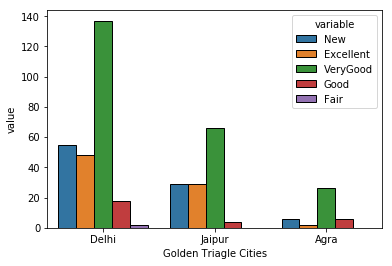

In [217]:
my_plot = sns.barplot(x = "Golden Triagle Cities", y = "value", hue = "variable", data = long_df)
sns.plt.show()

- Story point 4

The clusterd bar chart shows that most hotels provide satisfactory room service since it is evident that the green bars stand for "Very Good" service have a large amount of hotels listed below, followed by the orange bars, which represents "Excellent" service. 